# Machine learning foundation

## K-Nearest neighbor

In this lab, we explore classification using the K-Nearest Neighbors approach. We use a customer churn dataset from the telecom industry which includes customer data, usage of long-distance, data usage, monthly revenue, type of offerings, and other services purchased by customers. The data, based on a fictional telecom firm, include several Excel files which have been combined and are available in the course materials. We are using the subset of customers who have phone accounts. Since the data include a mix of numeric, categorical, and ordinal variables, we will load this data and do some preprocessing, then use K-nearest neighbors to predict customer churn rates.

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns
os.chdir('data')

#### Import the data

In [8]:
churndata=pd.read_csv("churndata_processed.csv")
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   months                     7043 non-null   float64
 1   multiple                   7043 non-null   int64  
 2   gb_mon                     7043 non-null   float64
 3   security                   7043 non-null   int64  
 4   backup                     7043 non-null   int64  
 5   protection                 7043 non-null   int64  
 6   support                    7043 non-null   int64  
 7   unlimited                  7043 non-null   int64  
 8   contract                   7043 non-null   float64
 9   paperless                  7043 non-null   int64  
 10  monthly                    7043 non-null   float64
 11  satisfaction               7043 non-null   float64
 12  churn_value                7043 non-null   int64  
 13  payment_Credit Card        7043 non-null   int64

In [12]:
pd.DataFrame([(i, len(churndata[i].unique())) for i in churndata.columns])

,0,1
0,months,5
1,multiple,2
2,gb_mon,50
3,security,2
4,backup,2
5,protection,2
6,support,2
7,unlimited,2
8,contract,3
9,paperless,2


In [14]:
churndata.months.unique()

array([0.  , 0.25, 0.5 , 1.  , 0.75])

In [15]:
churndata.churn_value.unique()

array([1, 0], dtype=int64)

#### Separate the features(X) from the target (y, churn_value)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [19]:
# Set up X and y variables
y, X=churndata['churn_value'], churndata.drop(columns='churn_value')

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [20]:
# Estimate KNN model and report outcomes
knn=KNeighborsClassifier(n_neighbors=3)
knn=knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [31]:
#  Precision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2048
           1       0.77      0.72      0.74       770

   micro avg       0.86      0.86      0.86      2818
   macro avg       0.83      0.82      0.82      2818
weighted avg       0.86      0.86      0.86      2818



In [32]:
print('Accuracry score: ', round(accuracy_score(y_test, y_pred), 2))

Accuracry score:  0.86


In [33]:
print('F1 score: ', round(f1_score(y_test, y_pred), 2))

F1 score:  0.74


Text(0.5, 87.0, 'Ground Truth')

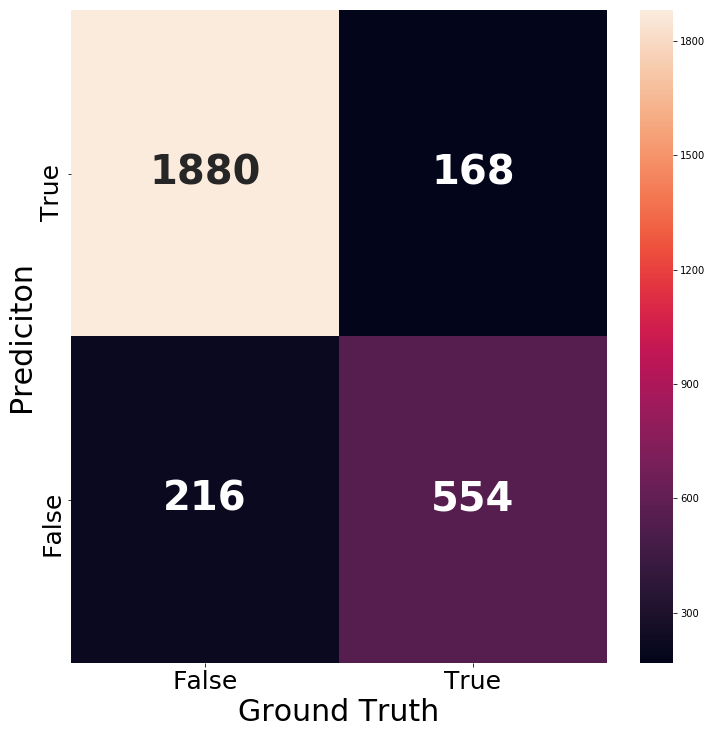

In [38]:
# Plot confusion matrix
_, ax=plt.subplots(figsize=(12,12))
ax=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
               fmt='d', annot_kws={"size":40, "weight":"bold"})
labels=['False', 'True']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels[::-1], fontsize=25)
ax.set_ylabel('Prediciton', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)

#### Estimate another KNN model using k=5

In [40]:
knn=KNeighborsClassifier(n_neighbors=5, weights='distance')
knn=knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [41]:
# Precision, recall, f-score
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2048
           1       0.78      0.74      0.76       770

   micro avg       0.87      0.87      0.87      2818
   macro avg       0.84      0.83      0.84      2818
weighted avg       0.87      0.87      0.87      2818

Accuracy score:  0.87
F1 score:  0.76


Text(0.5, 87.0, 'Ground Truth')

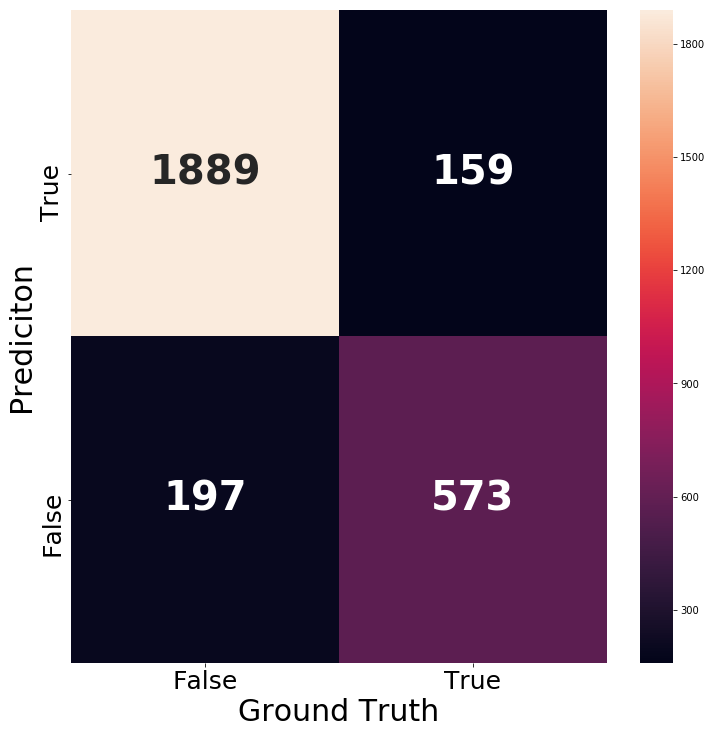

In [42]:
# Plot confusion matrix
_, ax=plt.subplots(figsize=(12,12))
ax=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
               fmt='d', annot_kws={"size":40, "weight":"bold"})
labels=['False', 'True']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels[::-1], fontsize=25)
ax.set_ylabel('Prediciton', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)

#### Determine the right value of k

In [53]:
max_k=40
f1_scores=list()
error_rates=list()

In [54]:
for i in range(max_k):
    knn=KNeighborsClassifier(n_neighbors=i+1, weights='distance')
    knn=knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    f1_scores.append((i+1, round(f1_score(y_test, y_pred), 4)))
    error_rates.append((i+1, 1-round(accuracy_score(y_test, y_pred), 4)))

In [55]:
f1_results=pd.DataFrame(f1_scores, columns=['K', 'F1_score'])
error_results=pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1800x1200 with 0 Axes>

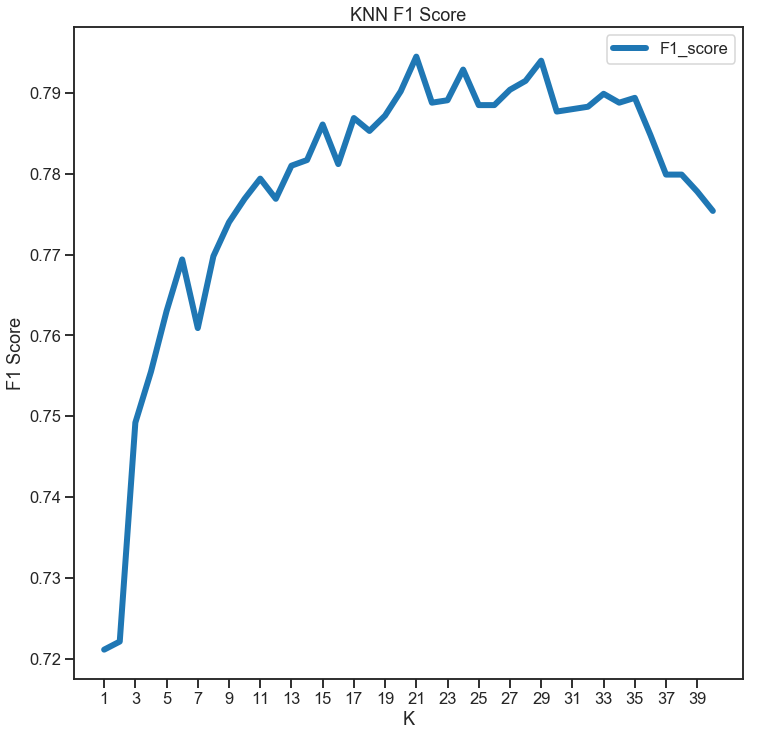

In [57]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax=f1_results.set_index('K').plot(figsize=(12,12), linewidth=6)
ax.set(xlabel= 'K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

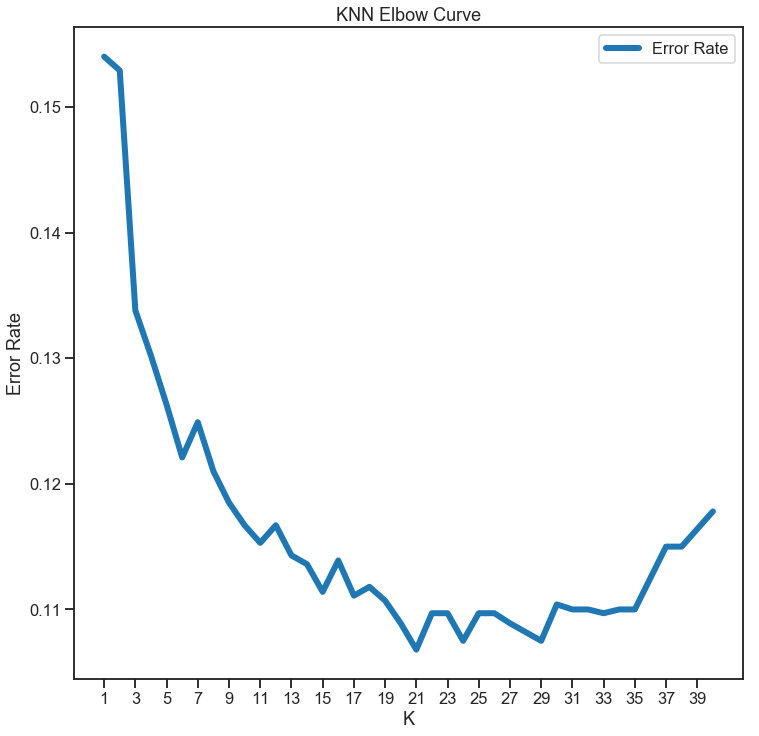

In [59]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
### END SOLUTION